In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

In [2]:
def load_df(fracPos, p, nruns):
    dfs = []
    for nrun in range(nruns):
        path = f"../simulations/test_q_voter_new/test_q_voter_new_NAGENTS=500000_NSTEPS=50000000_FRAC_LINKS=0.0_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=8_EPIDEMIC=beta=0.50_gamma=0.30_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=10.0_NRUN={nrun}.tsv"
        df = pd.read_csv(path, sep="\t")
        df = df[['step', 'meanOpinion']]
        dfs.append(df)
    dfs = pd.concat(dfs, axis=1)    
    steps = dfs.iloc[:, 0].values
    meanOpinion = (dfs['meanOpinion'].sum(axis=1) / dfs['meanOpinion'].shape[1]).values
    stdOpinion = np.std(dfs['meanOpinion'].values, axis=1)
    
    output = pd.DataFrame({'step': steps, 'meanOpinion': meanOpinion, 'stdOpinion': stdOpinion})
    return output
    
fracPositive = [f'0.{x}' for x in range(0, 10)]
fracPositive.append('1.0')
p = ['0.03', '0.06', '0.10']

p1 = [load_df(fP, p[0], 5) for fP in fracPositive]
p2 = [load_df(fP, p[1], 5) for fP in fracPositive]
p3 = [load_df(fP, p[2], 5) for fP in fracPositive]

In [3]:
fracPositive

['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

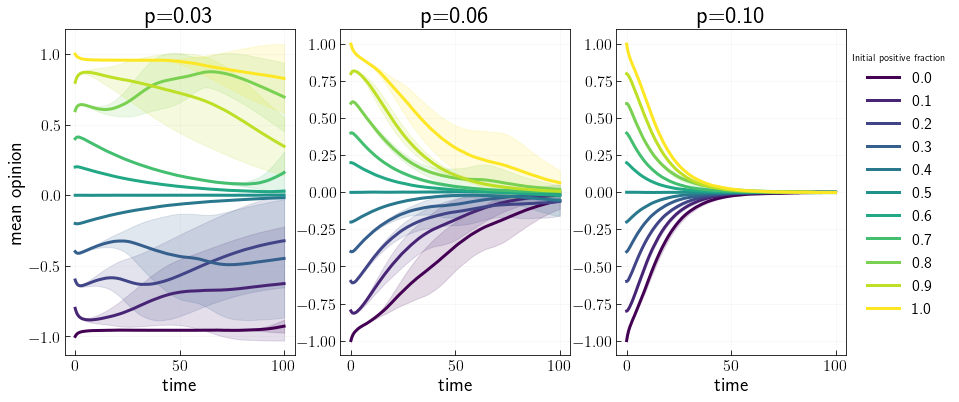

In [4]:
colormap = plt.cm.get_cmap('viridis', len(fracPositive))

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.xlabel("time")
plt.ylabel("mean opinion")
for i, df in enumerate(p1):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.15, edgecolor=colormap(i))
plt.title(f'p={p[0]}')

plt.subplot(1, 3, 2)
for i, df in enumerate(p2):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.15, edgecolor=colormap(i))
plt.title(f'p={p[1]}')
plt.xlabel("time")

plt.subplot(1, 3, 3)
for i, df in enumerate(p3):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.15, edgecolor=colormap(i))
plt.title(f'p={p[2]}')

plt.xlabel("time")
plt.legend(loc=(1, 0.1), title="Initial positive fraction")

In [5]:
def load_df_shuffle(fracPos, p, nruns):
    dfs = []
    for nrun in range(nruns):
        path = f"../simulations/test_q_voter_new_shuffle/test_q_voter_new_shuffle_NAGENTS=500000_NSTEPS=50000000_FRAC_LINKS=0.0_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=8_EPIDEMIC=beta=0.50_gamma=0.30_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=10.0_NRUN={nrun}.tsv"
        df = pd.read_csv(path, sep="\t")
        df = df[['step', 'meanOpinion']]
        dfs.append(df)
    dfs = pd.concat(dfs, axis=1)    
    steps = dfs.iloc[:, 0].values
    if nruns > 1:
        meanOpinion = (dfs['meanOpinion'].sum(axis=1) / dfs['meanOpinion'].shape[1]).values
        stdOpinion = np.std(dfs['meanOpinion'].values, axis=1)
    else:
        meanOpinion = dfs['meanOpinion'].values
        stdOpinion = dfs['meanOpinion'].values
    output = pd.DataFrame({'step': steps, 'meanOpinion': meanOpinion, 'stdOpinion': stdOpinion})
    return output

p1_shuffle = [load_df_shuffle(fP, p[0], 1) for fP in fracPositive]
p2_shuffle = [load_df_shuffle(fP, p[1], 1) for fP in fracPositive]
p3_shuffle = [load_df_shuffle(fP, p[2], 1) for fP in fracPositive]

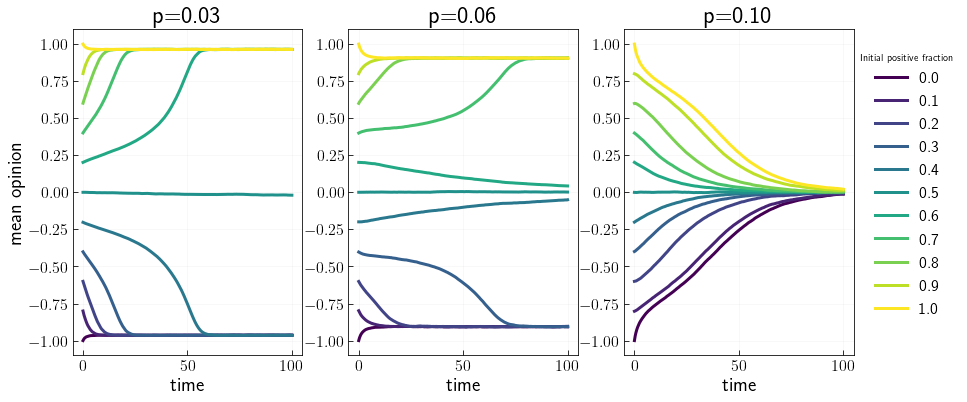

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.xlabel("time")
plt.ylabel("mean opinion")
for i, df in enumerate(p1_shuffle):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[0]}')

plt.subplot(1, 3, 2)
for i, df in enumerate(p2_shuffle):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[1]}')
plt.xlabel("time")

plt.subplot(1, 3, 3)
for i, df in enumerate(p3_shuffle):
    x = df.step / 5e5
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[2]}')

plt.xlabel("time")
plt.legend(loc=(1, 0.1), title="Initial positive fraction")

## Smaller network

```yaml
    nAgents: 10000
    nSteps: 1000000
    nSaveSteps: 1000
    nRuns: 10
    networkP: 0.0
    networkM: 20
    additionalLinksFraction: 0.0
    virtualLayer: true
    epidemicLayer: false
    comorbidities: false
    qVoterParameters:
      p: 0.06
      q: 8
    epidemicLayerParameters:
      beta: 0.5
      gamma: 0.3
      mu: 0.9
      kappa: 0.1
    maxInfectedTimeMean: 10
    maxInfectedTimeStd: 10
    positiveOpinionFraction: 0.1
    infectedFraction: 0.1
    fractionIllnessA: 0.0
    fractionIllnessB: 0.0
    outputFolder: simulations/test_q_voter_new_shuffle
    firstParameterRange:
      start: 0.0
      end: 1.0
      count: 11
      type: positiveOpinionFraction
```

In [7]:
def load_df_shuffle_small(fracPos, p, nruns):
    dfs = []
    for nrun in range(nruns):
        path = f"../simulations/test_q_voter_new_shuffle/test_q_voter_new_shuffle_NAGENTS=10000_NSTEPS=1000000_FRAC_LINKS=0.0_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=8_EPIDEMIC=beta=0.50_gamma=0.30_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=10.0_NRUN={nrun}.tsv"
        df = pd.read_csv(path, sep="\t")
        df = df[['step', 'meanOpinion']]
        dfs.append(df)
    dfs = pd.concat(dfs, axis=1)    
    steps = dfs.iloc[:, 0].values
    meanOpinion = (dfs['meanOpinion'].sum(axis=1) / dfs['meanOpinion'].shape[1]).values
    stdOpinion = np.std(dfs['meanOpinion'].values, axis=1)
    
    output = pd.DataFrame({'step': steps, 'meanOpinion': meanOpinion, 'stdOpinion': stdOpinion})
    return output
    
fracPositive = [f'0.{x}' for x in range(0, 10)]
fracPositive.append('1.0')
p = ['0.03', '0.06', '0.10']

p1_shuffle_small = [load_df_shuffle_small(fP, p[0], 10) for fP in fracPositive]
p2_shuffle_small = [load_df_shuffle_small(fP, p[1], 10) for fP in fracPositive]
p3_shuffle_small = [load_df_shuffle_small(fP, p[2], 10) for fP in fracPositive]

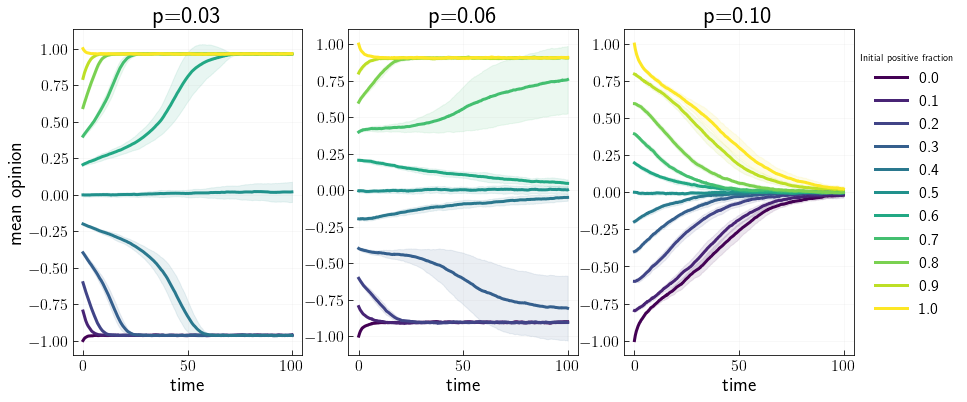

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.xlabel("time")
plt.ylabel("mean opinion")
for i, df in enumerate(p1_shuffle_small):
    x = df.step / 1e4
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.1, edgecolor=colormap(i))
        
plt.title(f'p={p[0]}')

plt.subplot(1, 3, 2)
for i, df in enumerate(p2_shuffle_small):
    x = df.step / 1e4
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.1, edgecolor=colormap(i))
        
plt.title(f'p={p[1]}')
plt.xlabel("time")

plt.subplot(1, 3, 3)
for i, df in enumerate(p3_shuffle_small):
    x = df.step / 1e4
    plt.plot(x, df.meanOpinion, label=fracPositive[i], color=colormap(i))
    plt.fill_between(x, df.meanOpinion - df.stdOpinion, df.meanOpinion + df.stdOpinion, 
                     color=colormap(i), alpha=.1, edgecolor=colormap(i))
        
plt.title(f'p={p[2]}')

plt.xlabel("time")
plt.legend(loc=(1, 0.1), title="Initial positive fraction")

## Check phase transition

In [9]:
def load_df_shuffle_phase(fracPos, ps, folder='test_q_voter_phase_k_8'):
    output = {}
    for p in ps:
        path = f"../simulations/{folder}/test_q_voter_phase_NAGENTS=100000_NSTEPS=10000000_FRAC_LINKS=0.0_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=2_EPIDEMIC=beta=0.50_gamma=0.30_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=10.0_NRUN=0.tsv"
        df = pd.read_csv(path, sep="\t")
        df = df[['step', 'meanOpinion']]
        output[float(p)] = (df.tail(1)['meanOpinion'].values[0] + 1) / 2

    return output
    
ps = ['{:.2f}'.format(x / 100) for x in range(0, 41)]

posFrac1 = load_df_shuffle_phase('1.0', ps)
negFrac1 = load_df_shuffle_phase('0.0', ps)

posFrac2 = load_df_shuffle_phase('1.0', ps, folder='test_q_voter_phase_k_6')
negFrac2 = load_df_shuffle_phase('0.0', ps, folder='test_q_voter_phase_k_6')

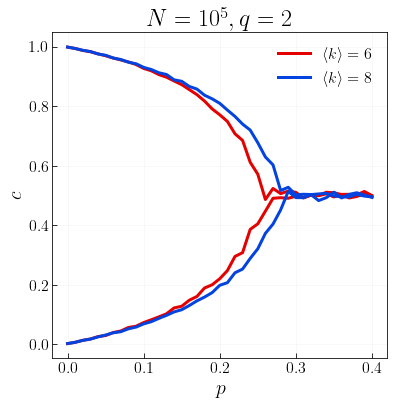

In [11]:
plt.figure(figsize=(6, 6))

plt.plot(posFrac2.keys(), posFrac2.values(), color="xkcd:red")
plt.plot(negFrac2.keys(), negFrac2.values(), color="xkcd:red", label=r"$\left<k\right>=6$")

plt.plot(posFrac1.keys(), posFrac1.values(), color="xkcd:blue")
plt.plot(negFrac1.keys(), negFrac1.values(), color="xkcd:blue", label=r"$\left<k\right>=8$")

plt.title(r"$N=10^5, q=2$")
plt.ylabel("$c$")
plt.xlabel("$p$")
plt.legend()
# plt.show()
plt.savefig("test.png")